#**Problem Statement:**
"The purpose of this study is to build a machine learning model that can predict how likely a customer will churn by analyzing its characteristics" 

#**Content:**
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

# **Import Basic Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Importing CSV file**

In [ ]:
data= pd.read_csv("Telco Customer Churn.csv",na_values=" ")

# **Analysing the DataFrame**

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# find Shape of data
data.shape

(7043, 21)

In [ ]:
# find datatype and non-null value is data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **Data Cleaning or missing value treatment:**

In [ ]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')

In [ ]:
#Feature 'TotalCharges' has 11 NaNs or missing values.So lets drop those missing values
data=data.dropna()

In [ ]:
data_copy= data.copy()
data.drop('customerID',axis=1,inplace=True)

# **Data Manipulation & Explratory Data Analysis**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [ ]:
for column in data.columns[:]:
    print(column,": ",data[column].unique())

gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :  [29.85 56.95 53.85 

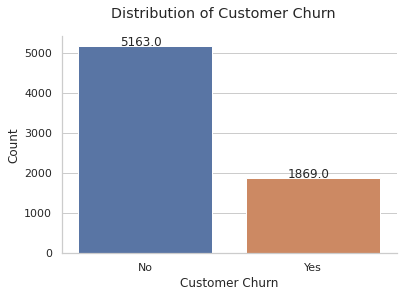

In [ ]:
#Looking at Distribution of the target variable
from matplotlib.pyplot import suptitle
from seaborn import despine
sns.set(style="whitegrid")
ax=sns.countplot(x='Churn', data=data)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

ax.set_xticklabels(["No","Yes"])
ax.set_ylabel("Count")
ax.set_xlabel("Customer Churn")
suptitle("Distribution of Customer Churn")
despine()


In [ ]:
data_dummies=pd.get_dummies(data)

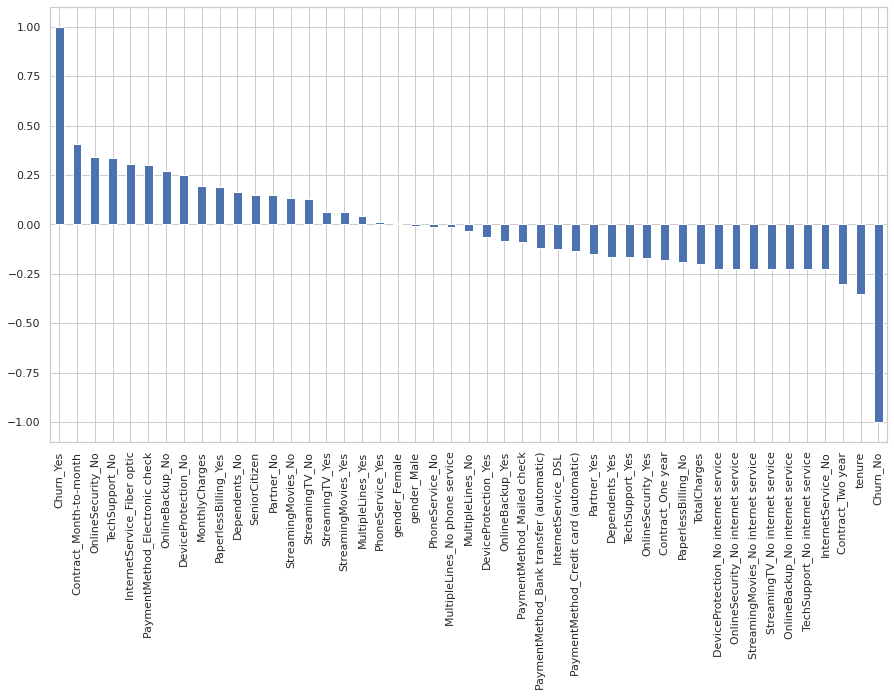

In [ ]:
plt.figure(figsize=(15,8))
data_dummies.corr()['Churn_Yes'].sort_values(ascending = False).plot(kind='bar')
plt.show()

**Observations**

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

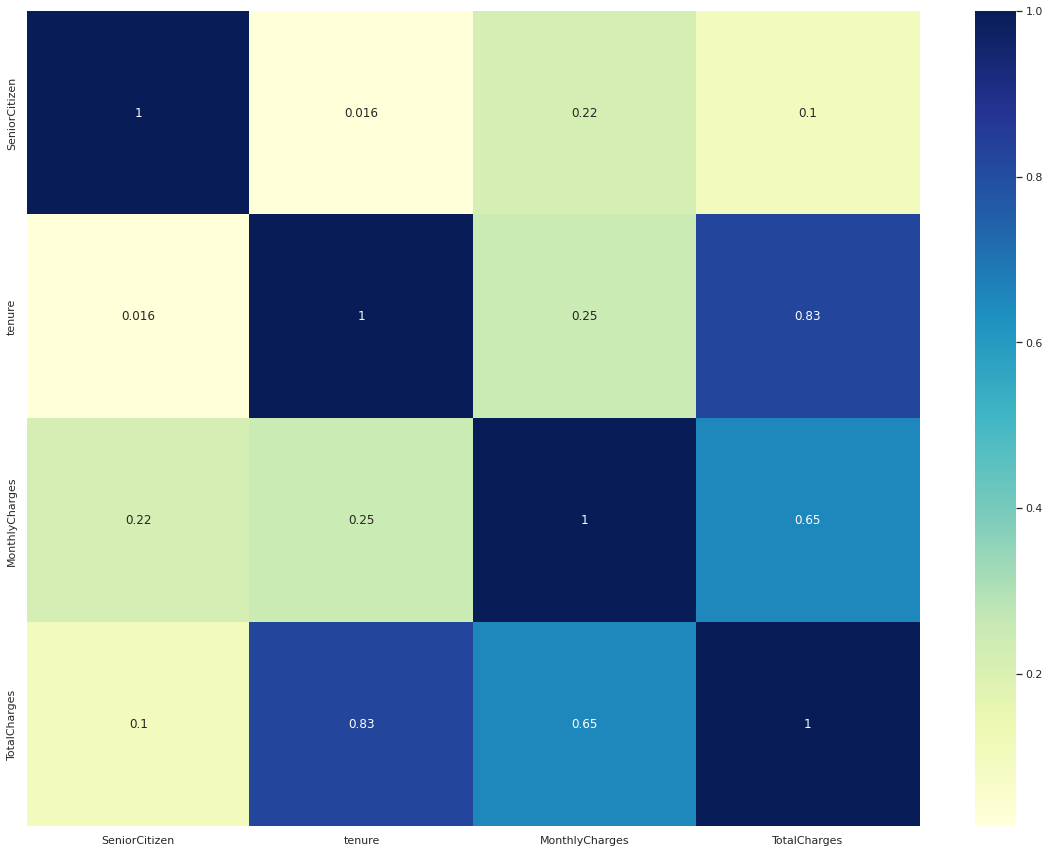

In [ ]:
data_new= data.copy()
corr=data_new.corr()


plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap="YlGnBu")

In [ ]:
df= data_new.copy()
df.loc[df.Churn=='No','Churn']=0
df.loc[df.Churn=='Yes','Churn']=1
df= df.groupby('tenure').Churn.mean().reset_index()

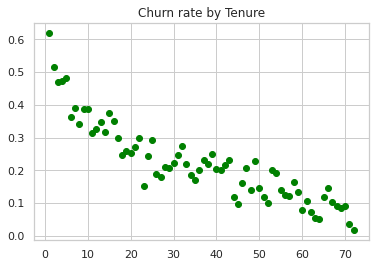

In [ ]:
# by tenure
plt.scatter(df.tenure, df.Churn, color = "green")
plt.title('Churn rate by Tenure')
plt.show()

In [ ]:
data['Churn']= data['Churn'].map({'Yes':1, 'No':0})

# **Demographic Information:**

In [ ]:
demo_features = ['gender','SeniorCitizen','Partner','Dependents']

for feature in demo_features:
    cross_table = data[[feature,'Churn']].groupby([feature], as_index=False).mean().sort_values(by='Churn', ascending=False)
    display(cross_table)
   
   

,gender,Churn
0,Female,0.269595
1,Male,0.262046


,SeniorCitizen,Churn
1,1,0.416813
0,0,0.236503


,Partner,Churn
0,No,0.329761
1,Yes,0.197171


,Dependents,Churn
0,No,0.312791
1,Yes,0.155312


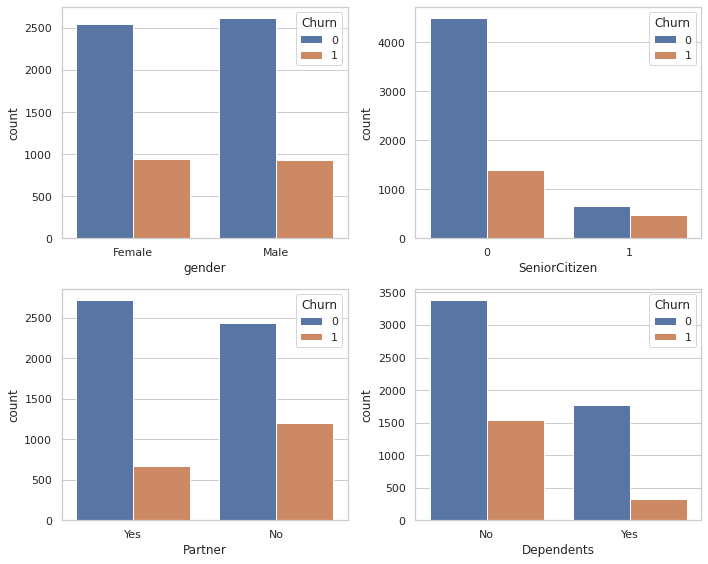

In [ ]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

sns.countplot(x="gender", hue="Churn", data=data, ax=axes[0,0])
sns.countplot(x="SeniorCitizen", hue="Churn", data=data, ax=axes[0,1])
sns.countplot(x="Partner", hue="Churn", data=data, ax=axes[1,0])
sns.countplot(x="Dependents", hue="Churn", data=data, ax=axes[1,1])
      
plt.tight_layout()
plt.show()

# **Service Information:**

In [ ]:
service_features = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
                    'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

for feature in service_features:
    cross_table = data[[feature,'Churn']].groupby([feature], as_index=False).mean().sort_values(by='Churn', ascending=False)
    display(cross_table)

,PhoneService,Churn
1,Yes,0.267475
0,No,0.250000


,MultipleLines,Churn
2,Yes,0.286485
0,No,0.250812
1,No phone service,0.250000


,InternetService,Churn
1,Fiber optic,0.418928
0,DSL,0.189983
2,No,0.074342


,OnlineSecurity,Churn
0,No,0.417787
2,Yes,0.146402
1,No internet service,0.074342


,OnlineBackup,Churn
0,No,0.399417
2,Yes,0.215670
1,No internet service,0.074342


,DeviceProtection,Churn
0,No,0.391403
2,Yes,0.225393
1,No internet service,0.074342


,TechSupport,Churn
0,No,0.416475
2,Yes,0.151961
1,No internet service,0.074342


,StreamingTV,Churn
0,No,0.335351
2,Yes,0.301147
1,No internet service,0.074342


,StreamingMovies,Churn
0,No,0.337289
2,Yes,0.299524
1,No internet service,0.074342


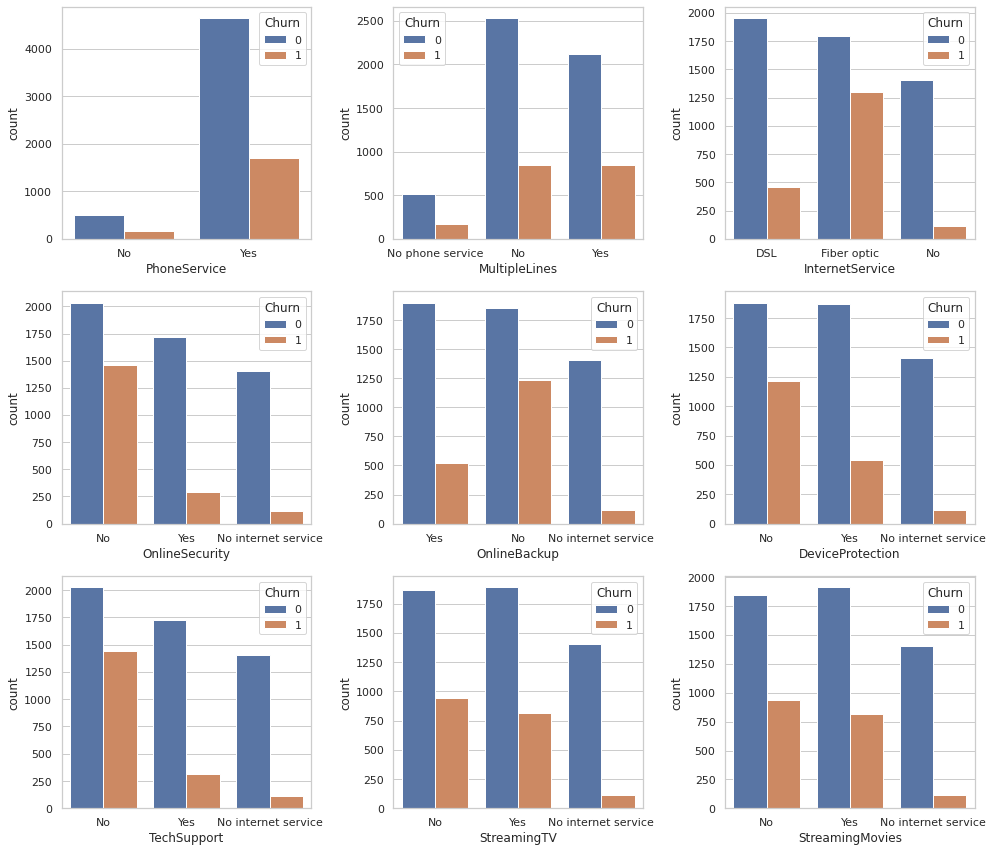

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,12))

sns.countplot(x="PhoneService", hue="Churn", data=data, ax=axes[0,0])
sns.countplot(x="MultipleLines", hue="Churn", data=data, ax=axes[0,1])
sns.countplot(x="InternetService", hue="Churn", data=data, ax=axes[0,2])
sns.countplot(x="OnlineSecurity", hue="Churn", data=data, ax=axes[1,0])
sns.countplot(x="OnlineBackup", hue="Churn", data=data, ax=axes[1,1])
sns.countplot(x="DeviceProtection", hue="Churn", data=data, ax=axes[1,2])
sns.countplot(x="TechSupport", hue="Churn", data=data, ax=axes[2,0])
sns.countplot(x="StreamingTV", hue="Churn", data=data, ax=axes[2,1])
sns.countplot(x="StreamingMovies", hue="Churn", data=data, ax=axes[2,2])

plt.tight_layout()
plt.show()

# **Account Information**

In [ ]:
acc_features = ['tenure','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']
cat_acc_features = ['Contract','PaperlessBilling','PaymentMethod']
num_acc_features = ['tenure','MonthlyCharges','TotalCharges']

for feature in cat_acc_features:
    cross_table = data[[feature,'Churn']].groupby([feature], as_index=False).mean().sort_values(by='Churn', ascending=False)
    display(cross_table)

,Contract,Churn
0,Month-to-month,0.427097
1,One year,0.112772
2,Two year,0.028487


,PaperlessBilling,Churn
1,Yes,0.335893
0,No,0.163757


,PaymentMethod,Churn
2,Electronic check,0.452854
3,Mailed check,0.192020
0,Bank transfer (automatic),0.167315
1,Credit card (automatic),0.152531


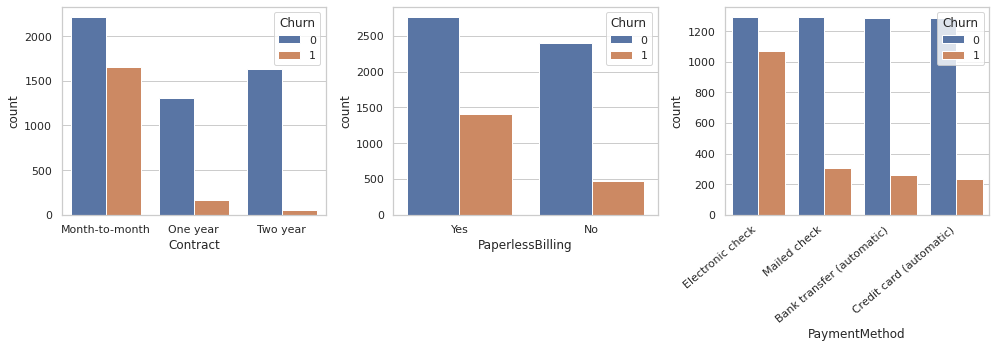

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,5))

sns.countplot(x="Contract", hue="Churn", data=data, ax=axes[0])
sns.countplot(x="PaperlessBilling", hue="Churn", data=data, ax=axes[1])
sns.countplot(x="PaymentMethod", hue="Churn", data=data, ax=axes[2])
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()
plt.show()


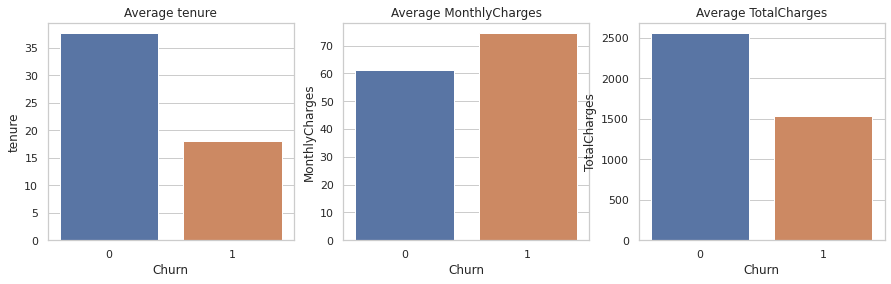

In [ ]:
df_churn = data.groupby(['Churn'], as_index=False).mean()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
for i in range(3):
    feature = num_acc_features[i]
    sns.barplot(x='Churn',y=feature, data=df_churn, ax=axes[i])
    axes[i].set_title(f"Average {feature}")
    axes[i].set_xlabel(f'Churn')
    axes[i].set_ylabel(f"{feature}")

In [ ]:
# One hot encoding using get_dummies method
data_dummy = pd.get_dummies(data, drop_first = True)
data_dummy.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
data_dummy.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)

In [ ]:
x = data_dummy.iloc[:,:-1]
y = data_dummy.iloc[:,-1]
print('Shape of X: {}'.format(x.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (7032, 30)
Shape of y: (7032,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

**StandardScaler** comes into play when the characteristics of the input dataset differ greatly between their ranges, or simply when they are measured in different units of measure. StandardScaler removes the mean and scales the data to the unit variance.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit_transform(x_train)

array([[-0.43730142, -0.34083158, -0.21055658, ...,  0.82499061,
        -0.52489066,  1.39574826],
       [-0.43730142,  1.57402378,  1.63040752, ..., -1.21213501,
         1.90515869, -0.71646158],
       [-0.43730142,  1.53328218, -1.30914275, ..., -1.21213501,
        -0.52489066, -0.71646158],
       ...,
       [-0.43730142,  0.71845011,  1.37407075, ..., -1.21213501,
         1.90515869, -0.71646158],
       [-0.43730142, -0.74824761,  0.52516325, ..., -1.21213501,
         1.90515869, -0.71646158],
       [-0.43730142,  1.28883256,  1.33079311, ...,  0.82499061,
         1.90515869, -0.71646158]])

# ***Applying GaussianNB Algorithm ***

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [ ]:
test_predict=gnb.predict(x_test)
train_predict=gnb.predict(x_train)

In [ ]:
Score_GNB_train=gnb.score(x_train,y_train)
Score_GNB_test=gnb.score(x_test,y_test)
print(Score_GNB_train)
print(Score_GNB_test)

0.8657777777777778
0.8464818763326226


# **Applying SVC Algorithm**

In [ ]:
from sklearn.svm import SVC
model= SVC()
model.fit(x_train,y_train)

SVC()

In [ ]:
train_predict_SVC= model.predict(x_train)
test_predict_SVC=model.predict(x_test)

In [ ]:
Score_SVC_train=model.score(x_train,y_train)
Score_SVC_test=model.score(x_test,y_test)
print(Score_SVC_train)
print(Score_SVC_test)

0.7724444444444445
0.7697228144989339


# **Applying KNN Algorithm**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
test_pred_knn=knn.predict(x_test)
train_pred_knn=knn.predict(x_train)

In [ ]:
Score_KNN_train=knn.score(x_train,y_train)
Score_KNN_test=knn.score(x_test,y_test)
print(Score_KNN_train)
print(Score_KNN_test)

0.8416
0.7889125799573561


# **Applying DecisionTree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
train_DT_predict= clf.predict(x_train)
test_DT_predict=clf.predict(x_test)

In [ ]:
Score_DT_train=clf.score(x_train,y_train)
Score_DT_test=clf.score(x_test,y_test)
print(Score_DT_train)
print(Score_DT_test)

0.9996444444444444
0.8294243070362474


# **Applying RandomForest Algorithm**





In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
train_predict_rfc= rfc.predict(x_train)
test_predict_rfc=rfc.predict(x_test)

In [ ]:
Score_RFC_train=rfc.score(x_train,y_train)
Score_RFC_test=rfc.score(x_test,y_test)
print(Score_RFC_train)
print(Score_RFC_test)

0.9996444444444444
0.8521677327647477


# **Applying LogisticRegression Algorithm **

In [ ]:
# Logistic Regression algorithm
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=50)
lg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=50)

In [ ]:
y_train_pred = lg.predict(x_train)
y_test_pred = lg.predict(x_test)

In [ ]:
Score_LR_train=lg.score(x_train,y_train)
Score_LR_test=lg.score(x_test,y_test)
print(Score_LR_train)
print(Score_LR_test)

0.8812444444444445
0.8578535891968728


# **Score Table**

In [ ]:
from pandas.core.frame import DataFrame
Model_Comparison = DataFrame({
    'Model' : ['Logistic Regression','SVM','KNN','Decision Tree','Random Forest','Gaussian NB'],
    'Scores_test': [Score_LR_test,Score_SVC_test,Score_KNN_test,Score_DT_test,Score_RFC_test,Score_GNB_test],
    'Scores_train': [Score_LR_train,Score_SVC_train,Score_KNN_train,Score_DT_train,Score_RFC_train,Score_GNB_train]
    })
Model_Comparison

,Model,Scores_test,Scores_train
0,Logistic Regression,0.857854,0.881244
1,SVM,0.769723,0.772444
2,KNN,0.788913,0.841600
3,Decision Tree,0.829424,0.999644
4,Random Forest,0.852168,0.999644
5,Gaussian NB,0.846482,0.865778


In [ ]:
Model_Comparison_df = Model_Comparison.sort_values(by= 'Scores_test', ascending=False)
Model_Comparison_df.reset_index()[Model_Comparison_df.columns]

,Model,Scores_test,Scores_train
0,Logistic Regression,0.857854,0.881244
1,Random Forest,0.852168,0.999644
2,Gaussian NB,0.846482,0.865778
3,Decision Tree,0.829424,0.999644
4,KNN,0.788913,0.841600
5,SVM,0.769723,0.772444


In [ ]:
y_train_pred = lg.predict(x_train)
y_test_pred = lg.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      4345
           1       0.74      0.75      0.74      1280

    accuracy                           0.88      5625
   macro avg       0.83      0.83      0.83      5625
weighted avg       0.88      0.88      0.88      5625



In [ ]:
cr = classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1083
           1       0.69      0.69      0.69       324

    accuracy                           0.86      1407
   macro avg       0.80      0.80      0.80      1407
weighted avg       0.86      0.86      0.86      1407



In [ ]:
from sklearn.metrics import confusion_matrix
conf_matix = confusion_matrix(y_test,y_test_pred)
conf_matix

array([[983, 100],
       [100, 224]])

In [ ]:
data_copy['Probability of Churn']= lg.predict_proba(data_dummy[x_test.columns])[:,1]

# **Conclusion:**

In [ ]:
data_copy[['customerID','Probability of Churn']].head()

,customerID,Probability of Churn
0,7590-VHVEG,0.003265
1,5575-GNVDE,0.687597
2,3668-QPYBK,0.821162
3,7795-CFOCW,0.615932
4,9237-HQITU,0.003978


*** Inference***:
From this we can infer that the first and last customer have the higher probability to churn. So there is an oppertunity to interact with them with new offers by knowing their  needs sothat they stay with the company. 
If there is higher parobability of churning, then no need to convince them as anyway they will leave.
